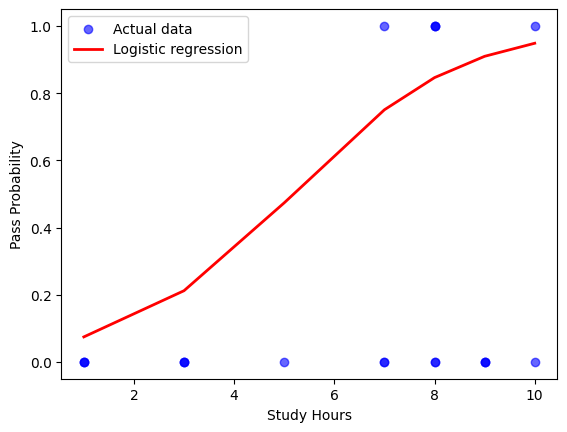

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv=pd.read_csv('lr_dataset.csv')
# print(csv)
x=np.array(csv['Study_Hours']).reshape(-1,1)
y=np.array(csv['Pass']).reshape(-1,1)
# print(y.shape)

x_train=x[:80]
x_test=x[80:]

y_train=y[:80]
y_test=y[80:]


# sigmoid function
def sigmoid_function(z):
    return 1/(1+np.exp(-z))

def Logistic_Regression_GD(x_train,y_train,learning_rate,n_iteration):
    m=len(y_train)
    w=np.zeros((x_train.shape[1],1))
    b=0

    for _ in range(n_iteration):
        # z= x_train @ w + b
        z=(x_train @ w)+b
        y_pred=sigmoid_function(z)
        # cost function
        cf=y_pred - y_train
        # dw: gradient
        dw=(1/m)*(x_train.T @ cf)
        # db: gradient
        db=(1/m)*np.sum(cf)
        # updating
        w-=learning_rate*dw
        b-=learning_rate*db

    return w,b

w_updated,b_updated=Logistic_Regression_GD(x_train, y_train, 0.1, 10000)
# print(w_updated)
# print(b_updated)

# model prediction
z=x_test @ w_updated + b_updated
y_prediction=sigmoid_function(z)
# print(y_prediction)

# plotting
sorted_idx = np.argsort(x_test.flatten())
x_sorted = x_test.flatten()[sorted_idx]
y_pred_sorted = y_prediction.flatten()[sorted_idx]

# Plot
plt.scatter(x_test, y_test, alpha=0.6, color='blue', label="Actual data")
plt.plot(x_sorted, y_pred_sorted, color='red',
         linewidth=2, label="Logistic regression")
plt.xlabel("Study Hours")
plt.ylabel("Pass Probability")
plt.legend()
plt.show()